# Credit Card Fraud Detection
In this notebook we are going to classify a credit card as fraud or non-fraud based on the data provided. Given data is highly imbalanced so we are going to use undersampling and oversampling techniques to classify

#### we will be using following models 
1. Random Forest Classifier
2. Decision Tree Classifier
3. Logistic Regression
4. XgBoost

Load the data using pandas

In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\gagan\Downloads\archive (2)\creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Data Preprocessing

Let's check if our data has any null values or not

In [2]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

we can see that we don't have any null values

some basic info about the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Let's scale the columns 'Amount' and 'time' using StandardScaler and the remaining columns V1 to V28 are already transformed with PCA

In [4]:
from sklearn.preprocessing import StandardScaler
data['scaled_amount']=StandardScaler().fit_transform(data['Amount'].to_numpy().reshape(-1,1))
data['scaled_time']=StandardScaler().fit_transform(data['Time'].to_numpy().reshape(-1,1))
data=data.drop(['Time','Amount'],axis=1)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151,1.641931
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117,1.641952
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839,1.641974
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249,1.641974


### Data Visualization

Let's see the counts of each class

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

[Text(0.5, 0, 'class'), Text(0, 0.5, 'count')]

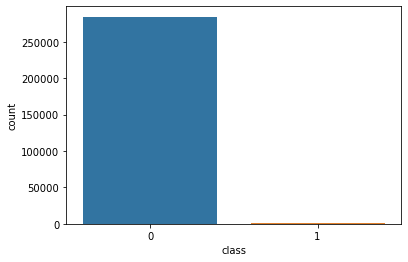

In [6]:
import seaborn as sns
bar=sns.countplot(x=data['Class'])
bar.set(xlabel='class',ylabel='count')

dividing the data into train and test

In [7]:
x_data=data.drop('Class',axis=1)
y_data=pd.DataFrame(data['Class'])

In [8]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42)
#x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)
x_train=train_data.drop('Class',axis=1)
y_train=train_data['Class']
x_test=test_data.drop('Class',axis=1)
y_test=test_data['Class']

As the number of fraud credit cards is very less as compared to non-fraud we can't directly fit the data. We need to use undersampling and oversampling techniques

### Undersampling

In undersampling we will randomly select samples of majority class of number equal to that of minority class

In [9]:
#undersampling
train_data = train_data.sample(frac=1)
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = train_data.loc[data['Class'] == 0][:492]
undersampled_data = pd.concat([fraud_data, non_fraud_data])
undersampled_data=undersampled_data.sample(frac=1, random_state=42)
undersampled_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
194969,1.980552,-0.410257,-3.113942,-0.488898,2.689900,3.177414,-0.071974,0.650698,0.203742,0.131336,...,-0.017489,0.069501,0.753386,0.236343,0.395804,-0.072629,-0.072839,0,-0.153365,0.758720
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1,-0.353229,1.243705
200508,-0.996253,1.233624,-0.081327,-0.010136,-0.054720,-0.960673,0.368643,0.186689,0.111844,0.105789,...,-0.633833,-0.010848,-0.143253,-0.834793,0.275484,-0.246514,0.105858,0,-0.335318,0.813829
239501,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1,0.595357,1.165033
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1,0.657967,-0.200658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41395,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1,-0.349231,-1.140326
142557,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,...,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,1,1.063412,-0.211103
89045,-0.200184,-0.420436,1.251614,0.270162,-1.413417,0.097013,0.716566,-0.042213,0.577532,-0.738114,...,0.221721,0.819714,0.463836,-1.348103,0.794793,0.090626,0.192258,0,0.657967,-0.682590
239499,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,-4.485483,...,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,1,-0.153325,1.165012


In [10]:
undersampled_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Splitting the data obtained after undersampling into train and test

In [11]:
x_undersampled=undersampled_data.drop('Class',axis=1)
y_undersampled=pd.DataFrame(undersampled_data['Class'])

In [12]:
from sklearn.model_selection import train_test_split
x_train_undersampled, x_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(x_undersampled,y_undersampled,test_size=0.2,random_state=42)

Now let us classify using different models

### Random Forest Classifier

In [13]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_undersampled,y_train_undersampled)
y_predict_undersampled=rfc.predict(x_test_undersampled)

C:\Users\gagan\AppData\Local\Temp/ipykernel_14620/3447791402.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train_undersampled,y_train_undersampled)


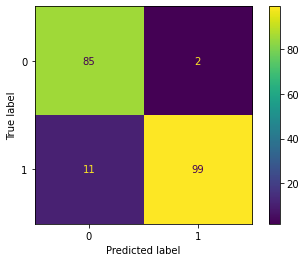

In [14]:
#confusion matrix for undersampled data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_undersampled,y_predict_undersampled,labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()
plt.show()

Evaluation metrics

In [15]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test_undersampled,y_predict_undersampled))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test_undersampled,y_predict_undersampled))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test_undersampled,y_predict_undersampled))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test_undersampled,y_predict_undersampled))

recall = 0.9
precision = 0.9801980198019802
f1 score = 0.9383886255924171
accuracy = 0.934010152284264


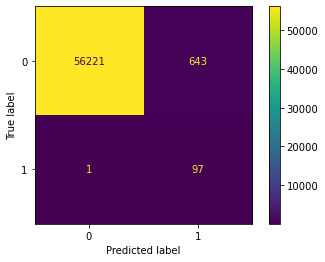

In [16]:
#confusion matrix for original data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_predict=rfc.predict(x_test)
cm = confusion_matrix(y_test,y_predict,labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()
plt.show()

In [17]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test,y_predict))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test,y_predict))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test,y_predict))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test,y_predict))

recall = 0.9897959183673469
precision = 0.13108108108108107
f1 score = 0.2315035799522673
accuracy = 0.9886942171974299


ROC Curve

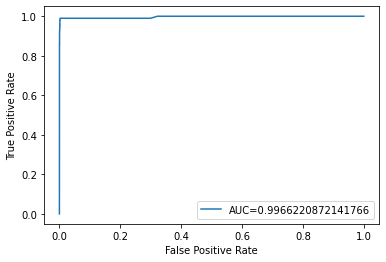

In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = rfc.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Decision Tree Classifier

In [19]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train_undersampled,y_train_undersampled)
y_predict_undersampled=dtc.predict(x_test_undersampled)

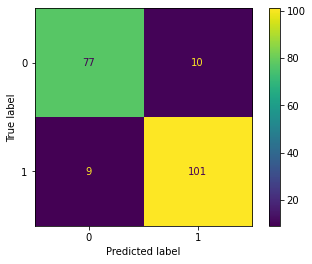

In [20]:
#confusion matrix for undersampled data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_undersampled,y_predict_undersampled,labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()

In [21]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test_undersampled,y_predict_undersampled))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test_undersampled,y_predict_undersampled))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test_undersampled,y_predict_undersampled))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test_undersampled,y_predict_undersampled))

recall = 0.9181818181818182
precision = 0.9099099099099099
f1 score = 0.914027149321267
accuracy = 0.9035532994923858


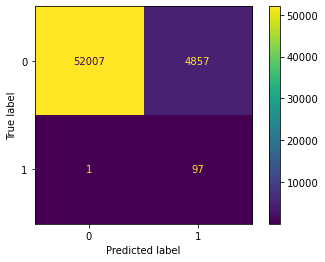

In [22]:
#confusion matrix for original data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_predict=dtc.predict(x_test)
cm = confusion_matrix(y_test,y_predict,labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()

In [23]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test,y_predict))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test,y_predict))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test,y_predict))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test,y_predict))

recall = 0.9897959183673469
precision = 0.019580137262817925
f1 score = 0.038400633412509905
accuracy = 0.9147150732066992


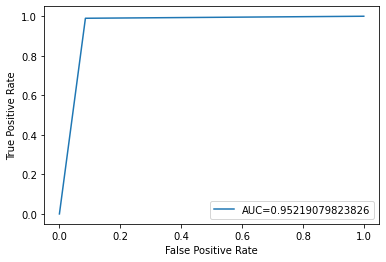

In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = dtc.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Logistic Regression

In [25]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train_undersampled,y_train_undersampled)
y_predict_undersampled=log.predict(x_test_undersampled)

C:\Users\gagan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


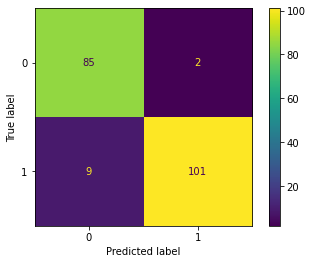

In [26]:
#confusion matrix for undersampled data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_undersampled,y_predict_undersampled,labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()
plt.show()

In [27]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test_undersampled,y_predict_undersampled))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test_undersampled,y_predict_undersampled))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test_undersampled,y_predict_undersampled))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test_undersampled,y_predict_undersampled))

recall = 0.9181818181818182
precision = 0.9805825242718447
f1 score = 0.9483568075117371
accuracy = 0.9441624365482234


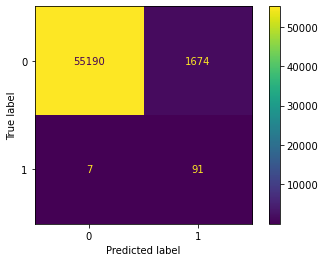

In [28]:
#confusion matrix for original data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_predict=log.predict(x_test)
cm = confusion_matrix(y_test,y_predict,labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()
plt.show()

In [29]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test,y_predict))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test,y_predict))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test,y_predict))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test,y_predict))

recall = 0.9285714285714286
precision = 0.05155807365439093
f1 score = 0.09769189479334407
accuracy = 0.9704890979951547


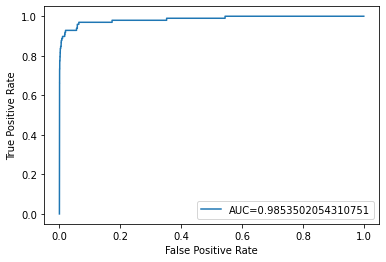

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = log.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### XGBoost

In [31]:
#xgboost
!pip install xgboost

In [32]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train_undersampled,y_train_undersampled)
y_predict_undersampled=xgb.predict(x_test_undersampled)

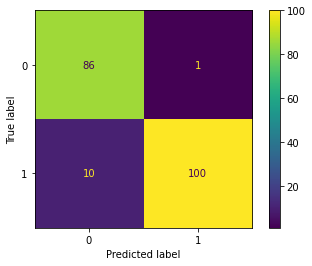

In [33]:
#confusion matrix for undersampled data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_undersampled,y_predict_undersampled,labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [34]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test_undersampled,y_predict_undersampled))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test_undersampled,y_predict_undersampled))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test_undersampled,y_predict_undersampled))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test_undersampled,y_predict_undersampled))

recall = 0.9090909090909091
precision = 0.9900990099009901
f1 score = 0.947867298578199
accuracy = 0.9441624365482234


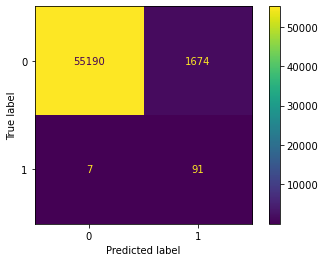

In [35]:
#confusion matrix for original data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_predict=log.predict(x_test)
cm = confusion_matrix(y_test,y_predict,labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [36]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test,y_predict))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test,y_predict))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test,y_predict))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test,y_predict))

recall = 0.9285714285714286
precision = 0.05155807365439093
f1 score = 0.09769189479334407
accuracy = 0.9704890979951547


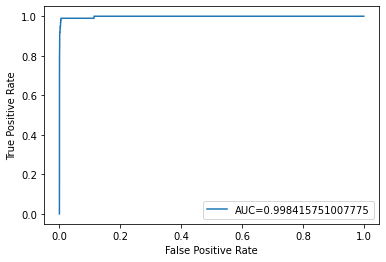

In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = xgb.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Oversampling using ADASYN(adaptive synthetic) technique

In [38]:
from collections import Counter
from imblearn.over_sampling import ADASYN
ada=ADASYN(random_state=42)
x_train_oversampled,y_train_oversampled=ada.fit_resample(x_train,y_train)

### Random Forest Classifier

In [39]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_oversampled,y_train_oversampled)
y_predict=rfc.predict(x_test)

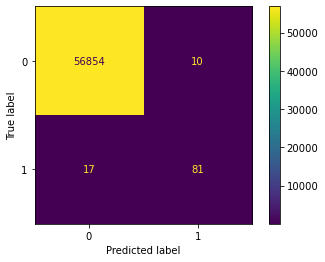

In [40]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_predict,labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()
plt.show()

In [41]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test,y_predict))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test,y_predict))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test,y_predict))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test,y_predict))

recall = 0.826530612244898
precision = 0.8901098901098901
f1 score = 0.8571428571428572
accuracy = 0.9995259997893332


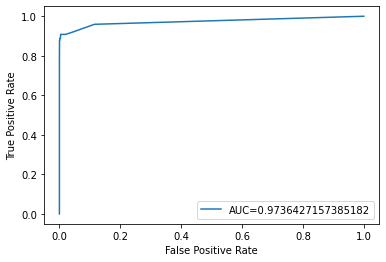

In [42]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = rfc.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Decision Tree Classifier

In [43]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train_oversampled,y_train_oversampled)
y_predict=dtc.predict(x_test)

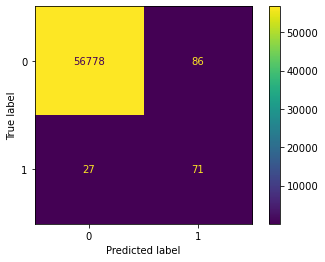

In [44]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_predict,labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()

In [45]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test,y_predict))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test,y_predict))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test,y_predict))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test,y_predict))

recall = 0.7244897959183674
precision = 0.45222929936305734
f1 score = 0.5568627450980391
accuracy = 0.9980162213405428


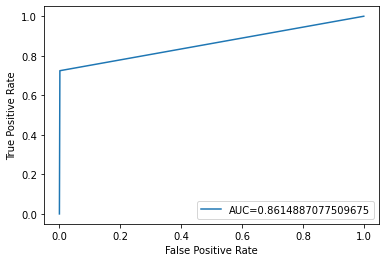

In [46]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = dtc.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Logistic Regression

In [47]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train_oversampled,y_train_oversampled)
y_predict=log.predict(x_test)

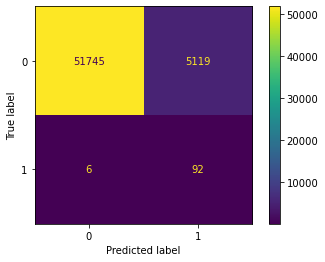

In [48]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_predict,labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()
plt.show()

In [49]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test,y_predict))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test,y_predict))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test,y_predict))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test,y_predict))

recall = 0.9387755102040817
precision = 0.017654960660142008
f1 score = 0.03465812770766623
accuracy = 0.9100277377901057


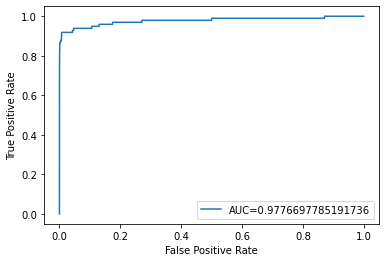

In [50]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = log.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### XGBoost

In [51]:
#xgboost
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train_oversampled,y_train_oversampled)
y_predict=xgb.predict(x_test)

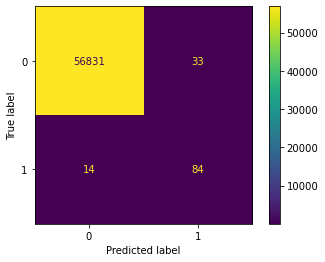

In [52]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_predict,labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [53]:
#recall
from sklearn.metrics import recall_score
print('recall =',recall_score(y_test,y_predict))

#precision
from sklearn.metrics import precision_score
print('precision =',precision_score(y_test,y_predict))

#f1 score
from sklearn.metrics import f1_score
print('f1 score =',f1_score(y_test,y_predict))

#accuracy
from sklearn.metrics import accuracy_score
print('accuracy =',accuracy_score(y_test,y_predict))

recall = 0.8571428571428571
precision = 0.717948717948718
f1 score = 0.7813953488372092
accuracy = 0.9991748885221726


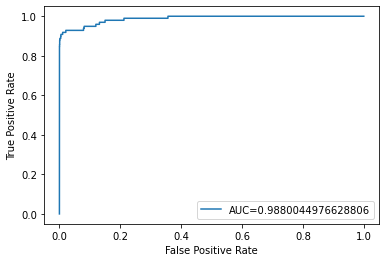

In [54]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = xgb.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()